# Chapter 12:  Vector Valued Functions

## Section 12.1 Vector Valued Functions and Curves in Space

From [our text](https://www.contemporarycalculus.com/dh/Calculus_all/CC12_1.pdf), we have:

Definition:  A **vector-valued function** is a rule that assigns a vector to each input number.  Typically a vector-valued function has the form

$$
\begin{align}
\boldsymbol{r(t)} = x(t)i + y(t)j + z(t)k = \boldsymbol{\langle x(t), y(t), z(t)\rangle}
\end{align}
$$

where x, y and z are scalar-valued functions.  

The domain consists of those $t$ in the domain of x, y, and z.

So the range is a collection of vectors.  

Below is an example of a vector valued function plotted in Sage:

In [28]:
t = var('t')
# Define the tuple or vector
r = (cos(t), sin(t), t)

# Use parametric_plot3d for curves
# Syntax: parametric_plot3d( (x, y, z), (variable, start, end) )
parametric_plot3d(r, (t, 0, 6*pi), thickness=2).show(aspect_ratio=(4,4,1))

Graphics3d Object

In [29]:
t = var('t')
f1 = 4 - 2*t
f2 = 2 - t
r2 = vector((t, f1, f2))
parametric_plot3d(r2, (t, 0, 2), thickness=2).show()

Graphics3d Object

## Limits

The limit of a vector valued function (so it appears) is also a vector:

![](./limits.png)

We can't find such limits directly in sage, but we can write a function to do it easily:

In [30]:
# Do assignment 12.1 with our new function 

t = var('t')
V = vector([4*t^2 - t - 2, (t^2 + 2*t -63)/(t-7), 2*cos(t)])
latex(V)

\left(4 \, t^{2} - t - 2,\,\frac{t^{2} + 2 \, t - 63}{t - 7},\,2 \, \cos\left(t\right)\right)

In [31]:
def vvf_limit(fn, v, a):
    """Returns a list with the limit of a vector valued function

    Parameters:  
        fn: The vector, list, or tuple representing the vector valued function
        v:  The variable used in the function
        a:  The "endpoint" or target of the limit, e.g. oo for infinity, 0, etc.

    Returns:
        A list of values with the limit of each component of the function
    """
    l = list(fn)
    return [limit(x, v, a) for x in l]
    
    t = var('t')
r5 = [cos(t), sqrt(4 + t), 3*e**(2*t)]
print(vvf_limit(r5, t, 0))

[1, 2, 3]


In [32]:
%display plain
t = var('t')
x(t) = 4*t^2 - t -2
y(t) = (t^2 + 2*t -63)/(t-7)
z(t) = 2 * cos(t)
V = [x(t), y(t), z(t)]
print("12.1 question 5")
print(V)
print(vvf_limit(V, t, 7))
print("\n12.1 question 5")
V2 = [2*t^2  + 3*t -1, (t^2 + 2*t -24)/(t-4), 4*cos(t)]
print(V2)
vvf_limit(V2, t, 4)

lim(sin(t)/t, t, 0)

12.1 question 5
[4*t^2 - t - 2, (t^2 + 2*t - 63)/(t - 7), 2*cos(t)]
[187, 16, 2*cos(7)]

12.1 question 5
[2*t^2 + 3*t - 1, (t^2 + 2*t - 24)/(t - 4), 4*cos(t)]


1

## Continutity
A vector valued function $r(t)$ is continuous at $t_0$ if $\lim\limits_{t \to t_0} r(t) = r(t_0)$

In [33]:
# An ellipse and an eliptical helix, comment out one or the other
x = var('x')
# parametric_plot([sin(x), 2*cos(x)], (x, 0, 2*pi))
parametric_plot3d([sin(x), 2*cos(x), x], (x, 0, 8*pi))

Graphics3d Object

In [34]:
# Sustitution example:

r5(t) = [cos(t), sqrt(4 + t), 3*e**(2*t)]

print(r5(9), N(r5(9)))

(cos(9), sqrt(13), 3*e^18) (-0.911130261884677, 3.60555127546399, 1.96979907411992e8)


In [35]:
# 1. Import the Cylinder shape
from sage.plot.plot3d.shapes import Cylinder
 
# 2. Create the cylinder object: Cylinder(radius, height)
C = Cylinder(1, 2, color='blue', opacity=0.4)
 
# 3. Display the graph
C.show(aspect_ratio=(1,1,1)) 
# aspect_ratio=(1,1,1) ensures the axes are scaled equally, so it looks circular

Graphics3d Object

# Section 12.2 - The Derivative of vector-valued functions

The derivative of a vector valued function is simply the derivative of each component, so as in the case of limits, we can implement a function to find one easily in Sage.

In [36]:
def vvf_diff(fn, v, diff_n=1):
    """Returns a list representing the limit of a vector valued function

    Parameters:  
        fn      : The vector, list, or tuple representing the vector valued function
        v       : The variable used in the function
        diff_n  : 1 for first derivative, 2 for second, etc.

    Returns:
        A list of values with the limit of each component of the function
    """
    l = list(fn)
    return vector([diff(x, v, diff_n) for x in l])

In [37]:
# Test out the vvf_diff function

var('x')
V = vector([x^3 + 3*x, ln(x), 5*x + 3])
V_prime = vvf_diff(V, x)
assert  V_prime.list() == [3*x^2 + 3, 1/x, 5]
print(V_prime)

(3*x^2 + 3, 1/x, 5)


In [38]:
# Solve a problem (12.2, q 3):
t = var('t')

print("Problem 12.2, q 3")
V = vector([-3*t^5 - 2, 4*e^(3*t), -5*sin(-3*t)])
print(V)
print(vvf_diff(V, t))

print("\nProblem 12.2, q 4")
V = vector([(-4)/(-t+6), (2*t)/(3*t^2 + 1), (-t^2)/(-7*t^3 - 2)])
print(V)
print(vvf_diff(V, t))

print("\nProblem 12.2, q 5 (second derivative)")
V = vector([6*t + 3*sin(t), 5*t + 6*cos(t)])
print (V)
print(vvf_diff(V, t, 2))
print(vvf_diff(vvf_diff(V, t), t))

Problem 12.2, q 3
(-3*t^5 - 2, 4*e^(3*t), -5*sin(-3*t))
(-15*t^4, 12*e^(3*t), 15*cos(-3*t))

Problem 12.2, q 4
(4/(t - 6), 2*t/(3*t^2 + 1), t^2/(7*t^3 + 2))
(-4/(t - 6)^2, -12*t^2/(3*t^2 + 1)^2 + 2/(3*t^2 + 1), -21*t^4/(7*t^3 + 2)^2 + 2*t/(7*t^3 + 2))

Problem 12.2, q 5 (second derivative)
(6*t + 3*sin(t), 5*t + 6*cos(t))
(-3*sin(t), -6*cos(t))
(-3*sin(t), -6*cos(t))


## Rules and Properties Related to Differentials of Vector Valued Functions

$$
\begin{align}
\begin{array}{|c|c|c|}
\hline
\textbf{Operation} & \textbf{Rule} & \textbf{Result Type} \\
\hline
\text{Sum} & \frac{d}{dt} \left[ \mathbf{r}_1(t) + \mathbf{r}_2(t) \right] = \mathbf{r}_1'(t) + \mathbf{r}_2'(t) & \text{Vector} \\
\hline
\text{Scalar Multiple} & \frac{d}{dt} \left[ c \mathbf{r}(t) \right] = c \mathbf{r}'(t) & \text{Vector} \\
\hline
\text{Product (Dot)} & \frac{d}{dt} \left[ \mathbf{r}_1(t) \cdot \mathbf{r}_2(t) \right] = \mathbf{r}_1'(t) \cdot \mathbf{r}_2(t) + \mathbf{r}_1(t) \cdot \mathbf{r}_2'(t) & \text{Scalar} \\
\hline
\text{Product (Cross)} & \frac{d}{dt} \left[ \mathbf{r}_1(t) \times \mathbf{r}_2(t) \right] = \mathbf{r}_1'(t) \times \mathbf{r}_2(t) + \mathbf{r}_1(t) \times \mathbf{r}_2'(t) & \text{Vector} \\
\hline
\text{Chain Rule} & \frac{d}{dt} \left[ \mathbf{r}(f(t)) \right] = f'(t) \mathbf{r}'(f(t)) & \text{Vector} \\
\hline
\end{array}
\end{align}
$$

## Velocity/Acceleration of Vector Valued Functions

In either $\mathbb{R}^2$ or $\mathbb{R}^3$ if a vector-valued function, $r(t)$ represents the curve of position (e.g. at point $t$), then $v(t) = r^{\prime}(t)$ is the velocity, and $r^{\prime\prime}(t)$ is the acceleration.  The speed is given by the magnitude of the velocity vector, $\|v(t)\|$.

To do this in code, see the following example based on functions we've already defined.

In [39]:
# Find the velocity vector and speed given a position vector
# Our results agree with the example shown in the Video assignment 12.2 Q4, so they are correct,
# but the simplification on the speed value leaves room for improvement.
t = var('t')
pos_vector = vector([cos(pi * t), sin(pi*t), t^2/2])
velocity_vector = vector(vvf_diff(pos_vector, t)) #  Need to wrap list in a vector again for "norm"
acceleration_vector = vvf_diff(pos_vector, t, 2)
speed = velocity_vector.norm().simplify()
print(velocity_vector)
print(acceleration_vector)
print(speed)

(-pi*sin(pi*t), pi*cos(pi*t), t)
(-pi^2*cos(pi*t), -pi^2*sin(pi*t), 1)
sqrt(pi^2*cos(pi*t)^2 + pi^2*sin(pi*t)^2 + t^2)


## The Unit Tangent Vector.

A unit tangent vector for a VVF, $r(t)$ is given by the derivative of the vector over the magnitude of that derivative.  (So it's similar to the formula for a unit vector.)

That is, assuming $r^{\prime}(t) \ne 0$,

$$
\begin{align}
T(t) = \frac{r^{\prime}(t)}{\|r^{\prime}(t)\|}
\end{align}
$$

### Calculating and Plotting a Unit Tangent Vector in SageMath

Let's calculate one for $r(t) = \langle t^3, 2t^2\rangle$, with a tangency point at t = 1.  We get the correct values, but this vector would need to be graphed with the origin at the tangency point, (1,2).  W

Tangency point:  (1, 2)
Tangent vector: (3/5, 4/5)


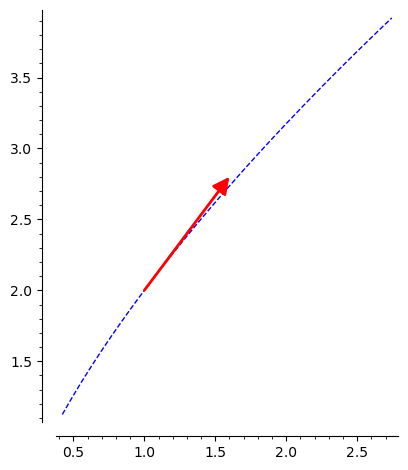

In [40]:
# Set up the curve
t = var('t')
r = vector([t**3, 2*t^2])

# Get the derivative, and plug in the point at which we want to draw the unit tangent vector
r_prime = vector(vvf_diff(r, t))
tangency_point = r(t=1)
print("Tangency point: ", tangency_point)

# Calculate the tangent vector using the formula above
tangent_vector = r_prime/r_prime.norm()
print("Tangent vector:", tangent_vector(t=1))

# Get a plot for the curve
plt = parametric_plot(r, (t, .75, 1.4), linestyle="dashed")

# Plot the unit tangent vector.  By setting start equal to our tangency point, we place
# the vector tail where it belongs
plt2 =  plot(tangent_vector(t=1), start=tangency_point, color="red")
plt += plt2                           
plt.show(aspect_ratio=1)

### A SageMath Function to get the Unit Tangent Vector

Since we'll need it again below for a curvature problem, let's implement a function to find a unit tangent vector:

In [80]:
def vvf_unit_tangent_vector(vec, var):
    """ gets a unit tangent vector for the vector vec defined in terms of the variable var"""
    r_prime = vector(vvf_diff(r, var))
    return r_prime/r_prime.norm()

t = var('t')
r = vector([t**3, 2*t^2])
print(vvf_unit_tangent_vector(r, t))

(3*t^2/sqrt(9*abs(t)^4 + 16*abs(t)^2), 4*t/sqrt(9*abs(t)^4 + 16*abs(t)^2))


## Anti-Derivatives:  Integration of Vector Valued Functions

Given our discussion of limits and derivatives, we might have guessed that the integral of a vector valued function is calculated by taking the integral of each of the components. Thus, for example, given an indefinite integral for $r(t) = \langle f(t), g(t), h(t)\rangle$, then the definite integral is as follows:

$$
\begin{aligned}
\int \mathbf{r}(t) \, dt = \left( \int f(t) \, dt \right) \mathbf{i} + \left( \int g(t) \, dt \right) \mathbf{j} + \left( \int h(t) \, dt \right) \mathbf{k} + \mathbf{C}
\end{aligned}
$$

For the definite integral, we have:
$$
\begin{aligned}
\int_{a}^{b} \mathbf{r}(t) \, dt = \left( \int_{a}^{b} f(t) \, dt \right) \mathbf{i} + \left( \int_{a}^{b} g(t) \, dt \right) \mathbf{j} + \left( \int_{a}^{b} h(t) \, dt \right) \mathbf{k}
\end{aligned}
$$

As we did before for limits and derivatives, we can easily implement this in sage

In [41]:
def vvf_integrate(fn, v, limits=None):
    """Returns a list with the integral of each component of a vector-valued function

    Parameters:  
        fn: The vector, list, or tuple representing the vector valued function
        v:  The variable used in the function
        limits: Either none or a two-element iterable for a definite integral.

    Returns:
        A list of values with the limit of each component of the function

    Notes: 
        Initial condition problems are not yet handled by this function.        
    """
    l = list(fn)
    
    if limits is None:
        return [integrate(x, v) for x in l]
    else:
        return [integrate(x, v, limits[0], limits[1]) for x in l]
    
    t = var('t')
r5 = [cos(t), sqrt(4 + t), 3*e**(2*t)]

# Test it out
print(vvf_integrate(r5, t))
print(vvf_integrate(r5, t, (0, pi/2)))

[sin(t), 2/3*(t + 4)^(3/2), 3/2*e^(2*t)]
[1, 2/3*(1/2*pi + 4)^(3/2) - 16/3, 3/2*e^pi - 3/2]


In [42]:
# Solve some problems with it.  Let's start with 12.2, Q6

t = var('t')
r = vector([-4*t^2 + 1, -1*e^(-1 * t), 5 * sin(-4*t)])
print("12.2 Q6", vvf_integrate(r, t))

print("\nAdd initial conditions manually\nto each term for the next problem:")
r = vector([3 + 4*t, cos(t), 6*e^(3*t)])
print("\t12.2 Q7", vvf_integrate(r, t))

12.2 Q6 [-4/3*t^3 + t, e^(-t), 5/4*cos(4*t)]

Add initial conditions manually
to each term for the next problem:
	12.2 Q7 [2*t^2 + 3*t, sin(t), 2*e^(3*t)]


In [43]:
diff(ln(2*t))

1/t

In [44]:
# Solving 12.2 Q9.  We're asked to find the angle of 
# intersection between two vectors.  Originally I though we could just 
# use get_angle_between_vectors with respect to the two vectors "as is", 
# but it turns out we needed the angle between the tangent vectors
# of each funciton, so get the derivative first.

# Copied from another notebook -- at some point this needs to be a library!
def get_angle_between_vectors(v: vector, w: vector):
    """returns the angle between two vectors in radians."""
    cos_theta = (v*w)/(v.norm() * w.norm())
    return acos(cos_theta)

r1 = vector([2*t, t^3, -1*t^4])
r2 = vector([sin(-2 * t), sin(2*t), t - pi])

angle_as_fn = get_angle_between_vectors(diff(r1, t), diff(r2, t))
print(N(angle_as_fn(t=0)))

2.30052398302186


## Solving another unit tangent vector problem

Question 12.2 # 10 asks us to find the unit tangent vector at the point $t = 0$ for the function $r(t) = \langle 4t^5 -2, -2 e^{3t}, -2 sin(5t)  \rangle$

Let's do this using the technique we developed earlier:

In [45]:
# Set up the curve
t = var('t')
r = vector([4*t^5 - 2, -2*e^(3*t), -2 * sin(5*t)])
print(r)


# Get the derivative, and plug in the point at which we want to draw the unit tangent vector
r_prime = vector(vvf_diff(r, t))
tangency_point = r(t=0)
print("Tangency point: ", tangency_point)

# Calculate the tangent vector using the formula above
tangent_vector = r_prime/r_prime.norm()
print("Unit tangent vector:", tangent_vector(t=0))

(4*t^5 - 2, -2*e^(3*t), -2*sin(5*t))
Tangency point:  (-2, -2, 0)
Unit tangent vector: (0, -3/34*sqrt(34), -5/34*sqrt(34))


## Solving Some Velocity and Acceleration Vector Problems

12.2 question 11:

Given the vector function $\mathbf{r}(t) = \left< -3t, \ -5t^3, \ -t^2 + 5 \right>$

Find the **velocity** and **acceleration** vectors at $t = -2$

In our solution, below, we are finding derivatives as needed using vvf_diff. We don't have a way to substitute into a whole vector (as far as I know), so we use a for comprehension in which we substitute each term to arrive at the correct vector.

In [46]:
t = var('t')
pos = r = vector([-3*t, -5*t^3, -t^2 + 5])
# print(r)

vel = vvf_diff(pos, t)
# print(vel)

accel = vvf_diff(vel, t)
# print(accel)

vel_at_minus_two = [x(t=-2) for x in vel]
accel_at_minus_two = [x(t=-2) for x in accel]

print("velocity at -2", vel_at_minus_two)
print("acceleration at -2", accel_at_minus_two)

velocity at -2 [-3, -60, 4]
acceleration at -2 [0, 60, -2]


## Working with Initial Values

Question 12 asks us to find the anti-derivative of the acceleration function given initial condition for both our velocity and acceleration.  Since our ```vvf_integrate``` function doesn't handle initial conditions.

My first attempt at this problem failed, as shown in this [Gemini session](https://gemini.google.com/share/39e29d86177d) where I checked my work.  To solve it correctly, I decided to capture the correct procedure that Gemini used by writing a SageMath function (yes, mine, not Gemini's -- I do *some* thinking here after all).

Here is the problem and the solution:

Find the position vector for a particle with acceleration, initial velocity, and initial position given below.

12.2 Question 12:

$$
\mathbf{a}(t) = \left< 6t, 4\sin(t), \cos(5t) \right>
$$

$$
\mathbf{v}(0) = \left< -3, 4, 3 \right>
$$

$$
\mathbf{r}(0) = \left< 2, -2, 4 \right>
$$

We're asked to find $\mathbf{r}(t)$.


Note, my first attempt at this was rather naive, adding the initial values to each expression.  What's really needed is for each term, $n \in [0,2] $ of the velocity vector, for example:

Solve for $V(t=0) + C_n = intial_values[n]$

In [47]:
# Let's begin with our acceleration vector, 
# integrate it, and "add" the v(0) initial condition as a vector



def vvf_initial_values(vec, var, init_val, init_val_equals):
    """ Given an integral of a function in vec, returns a function based on initial values.

        This involved solving for the constant of integration for each term.
        
        Parameters:
            vec:           a function representing an indefinite integral of a vector_valued_function
            var:           the variable to substitute the initial_val
            init_val:      the initial variable
            init_val_equals:  a list of results for the function vec at the init_val

        Returns:
            a vector with the consants of integration adjusted appropriately
    """    


    # Result vector we'll be building.
    init_values_solved = []

    # Constant names
    C = SR.var("C1, C2, C3")

    for i in range(0, len(vec)):
        # Start building the term for this "component" of the vector
        # based on subtituting the initial value
        substituted = (vec[i]).subs({var: init_val})
        # Using the result, solve for constant of integration and add it to the 
        # component we're working on.
        val = solve(substituted + C[i] - init_val_equals[i], C[i])[0]
        init_values_solved.append(vec[i] + val.rhs())
        
    return init_values_solved

# Work problem 12.2 # 12

t = var('t')
A = vector([6*t, 4*sin(t), cos(5*t)])

# Integrate the velocity vector, V, then modify it to V_0 based on the initial conditions
V = vector(vvf_integrate(A, t))
print("V: ", V)
V_0 = vvf_initial_values(V, t, 0, [-3, 4, 3])
print("V_0: ", V_0)

# Do the same for the acceleration vector
R = vector(vvf_integrate(V_0, t))
print("R: ", R)
R_0 = vvf_initial_values(R, t, 0, [2, -2, 4])
print("R_0: ", R_0)

print("At this point R_0 contains our final answer.")

V:  (3*t^2, -4*cos(t), 1/5*sin(5*t))
V_0:  [3*t^2 - 3, -4*cos(t) + 8, 1/5*sin(5*t) + 3]
R:  (t^3 - 3*t, 8*t - 4*sin(t), 3*t - 1/25*cos(5*t))
R_0:  [t^3 - 3*t + 2, 8*t - 4*sin(t) - 2, 3*t - 1/25*cos(5*t) + 101/25]
At this point R_0 contains our final answer.


# Section 12.3 Arc Length and Curvature of Space Curves

## Arc Length Formula

Here is a formula given in the video assignment 12.3 Q1:

If a smooth curve is defined by
$\mathbf{r}(t) = f(t)\mathbf{i} + g(t)\mathbf{j} + h(t)\mathbf{k}$ on $[a,b]$

the arc length on the interval is given by

$$s = \int_a^b \sqrt{[x'(t)]^2 + [y'(t)]^2 + [z'(t)]^2} \, dt$$

$$s = \int_a^b ||\mathbf{r}'(t)|| \, dt$$

This is the same formula used for parameterized functions, but we now see in this case it represents the integral of the magnitude of the derivative of r of t.  In the next code block, we follow along with that same video's example to see if we can arrive at the same answer in SageMath.  Spoiler alert, the output for arc_len, below, is correct.

### Finding the Arc Length of a curve in SageMath

In [54]:
t = var('t')
r = vector([2*cos(t), 2 * sin(t), 2*t])

# We are asked to find the arc length from 0 to pi
r_prime = vector(vvf_diff(r, t))
print("r_prime: ", r_prime)
magnitude = r_prime.norm()
print("magnitude: ", magnitude)
arc_len = integrate(magnitude, (t, 0, pi))
print("arc_len: ", arc_len)


def vvf_arc_length(vec, var, a, b):
    r_prime = vector(vvf_diff(vec, var))
    magnitude = r_prime.norm()
    arc_len = integrate(magnitude, (t, a, b))
    return arc_len

print("Arc len from function: ", vvf_arc_length(r, t, 0, pi))

r_prime:  (-2*sin(t), 2*cos(t), 2)
magnitude:  2*sqrt(abs(cos(t))^2 + abs(sin(t))^2 + 1)
arc_len:  2*sqrt(2)*pi
Arc len from function:  2*sqrt(2)*pi


In [59]:
# Problem 12.3 Q1
t = var('t')
r = vector([5*cos(t), 5*sin(t), 4*t])
print(vvf_arc_length(r, t, 0, 2*pi))

2*sqrt(41)*pi


In [62]:
# Problem 12.3 Q2
t = var('t')
r = vector([4*cos(2*t), 4*sin(2*t), 4*t])
arc_len = vvf_arc_length(r, t, -8, 6)
print(arc_len, " = approx ", round(N(arc_len), 2))

12*sqrt(5)*pi - 8*sqrt(5)*(pi - 4) - 4*sqrt(5)*(pi - 6)  = approx  125.22


In [64]:
# Problem 12.3 Q3
t = var('t')
r = vector([e^(4*t) * cos(t), e^(4*t) * sin(t)])
arc_len = vvf_arc_length(r, t, 0, 10)
print(arc_len)

1/4*sqrt(17)*e^40 - 1/4*sqrt(17)


## Curvature

The curvature, $K$, at a point measures how sharply the curve bends or how quickly it changes direction.  For a line, curvature is zero, no bend.  For a circle, curvature, $K$ is $K = \frac{1}{r}$, so it's greater for smaller circles and more gradual on a larger circle.

There are two formulas for this.

### Formula 1
Here, curvature measures how quickly the direction of $\boldsymbol{T}(t)$ changes with respect to arc length, $s$

$$
\begin{alignat*}{2}
K &= \left\| \frac{d\boldsymbol{T}}{ds}\right\| = 
\left\|\frac{d\boldsymbol{T}/dt}{
ds/dt}\right\|
\\
\\
K &= \frac{\|\boldsymbol{T^{\prime}}(t)\|}{\|r^{\prime}(t)\|}
\end{alignat*}
$$

Here $d\boldsymbol{T}/dt$ is derivatrive of unit tangent vector value function, $\boldsymbol{T^{\prime}}(t)$, and $ds/dt$ is the derivative of the position function, $r(t)$ which is to say, the velocity function.

### Formula 2
Alternative formula:  

$$
\begin{alignat*}{2}
K &= \frac{\left\| r^{\prime}(t) \times r^{\prime\prime}(t) \right\|}{\left\| r^{\prime}(t)\right\|^3}
\end{alignat*}
$$

### Evaluating Curvature in SageMath

Below we will implement formula 2 in SageMath:

In [51]:
def vvf_get_curvature(vvf, variable, value):
    """ Determines the curvature of the vector valued function vvf for the variable at value.        Implements function 2 shown in the avoc

    Parameters:
        vvf: The vector valued function representing the curve / space curve. 
        variable: the variable that we'll evaluate at the value given by value
        value: the value at which we want to determine curvature.
    """
    global t
    subst_dict = {variable: value}
    r_prime = (vvf_diff(vvf, t)).subs(subst_dict)
    r_double_prime = (vvf_diff(vvf, variable, 2)).subs(subst_dict)
    numerator = (r_prime.cross_product (r_double_prime)).norm()
    denominator = (r_prime.norm())^3
    return (numerator/denominator)

# Test it out on an example from the video:
t = var('t')
r = vector([t, t^2/2, t^3/3])
K = vvf_get_curvature(r, t, 1)
print("Curvature, exact: ", K)
print("Curvature, approx: ", N(K))
#print(N(sqrt(2)/3))

Curvature, exact:  1/9*sqrt(6)*sqrt(3)
Curvature, approx:  0.471404520791032


In [67]:
# Problem 12.3 Q 4
t = var('t')
r = vector([-5*t, 3*t^2, -5*t^3])
K = vvf_get_curvature(r, t, 1)
round(N(K), 4)

0.0367

In [70]:
# Problem 12.3 Q 5
t = var('t')
r = vector([-3*t, -4*t^2, 2*t^4])
K = vvf_get_curvature(r, t, -2)
round(N(K), 4)

0.0037

In [71]:
# Problem 12.3 Q 6
t = var('t')
r = vector([2*cos(2*t), 2* sin(2*t), 1*t])
K = vvf_get_curvature(r, t, 0)
round(N(K), 2)

0.47

In [73]:
# Problem 12.3 Q 7
t = var('t')
# Need to add a zero value as a dummy to get cross-product
# in vvf_get_curvature to work.
r = vector([6*cos(t), 5* sin(t), 0])
K = vvf_get_curvature(r, t, (5*pi)/6)
print(K)

80/4107*sqrt(111)


In [96]:
# Problem 12.3 Q 8 can't be solved with vvf_get_curvature because of a divide by zero issue.
# So we'll implement a function using formula one and see if we can arrive at an answer that way.
# NOTE:  The answer given is not correc 

def vvf_get_curvature_formula1(vvf, variable, value):
    unit_tangent_vector = vvf_unit_tangent_vector(vvf, variable)
    dT = vvf_diff(unit_tangent_vector, variable)
    #print(dT.norm())
    numerator = dT.norm().subs({variable: value})
    #print("num:", numerator)

    ds = vvf_diff(vvf, variable)
    denominator = ds.norm().subs({variable: value})
    # print("den: ", denominator)
    return numerator/denominator
    

x = var('x')
r = vector([0, -3*x^5, 0])
K = vvf_get_curvature_formula1(r, x, -2)
print("This is not the correct answer.  More work is needed: ", K)


This is not the correct answer.  More work is needed:  0
